In [74]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
from scipy.stats import shapiro, kstest

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [75]:
df = pd.read_csv("abc_clean.csv", index_col=0)
df.head()

,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,No,Unknown,2015.72,Unknown,6,3,Unknown,1,1,Male,NaN,3,5,Research Director,3,Unknown,16280.83,42330.17,7,No,13,3.0,3,Full Time,0,NaN,5,3.0,20,15,15,1972,195370.0,Yes
1,No,Unknown,2063.39,Unknown,1,4,Life Sciences,2,3,Male,NaN,2,5,Manager,3,Unknown,NaN,43331.17,0,Unknown,14,3.0,1,Unknown,1,34.0,5,3.0,33,11,9,1971,199990.0,Yes
2,No,Rarely,1984.25,Research & Development,4,2,Technical Degree,3,3,Male,NaN,3,5,Manager,4,Married,NaN,41669.33,1,No,11,3.0,4,Unknown,0,22.0,3,3.0,22,11,15,1981,192320.0,Yes
3,No,Rarely,1771.40,Unknown,2,4,Medical,4,1,Female,NaN,3,4,Research Director,3,Married,14307.50,37199.50,3,Unknown,19,3.0,2,Full Time,2,NaN,2,3.0,20,5,6,1976,171690.0,No
4,No,Unknown,1582.77,Unknown,3,3,Technical Degree,5,1,Female,NaN,4,4,Sales Executive,1,Divorced,12783.92,33238.20,2,No,12,3.0,4,Unknown,1,NaN,5,3.0,19,2,8,1977,NaN,No


In [76]:
correlacion = df.corr(numeric_only=True)

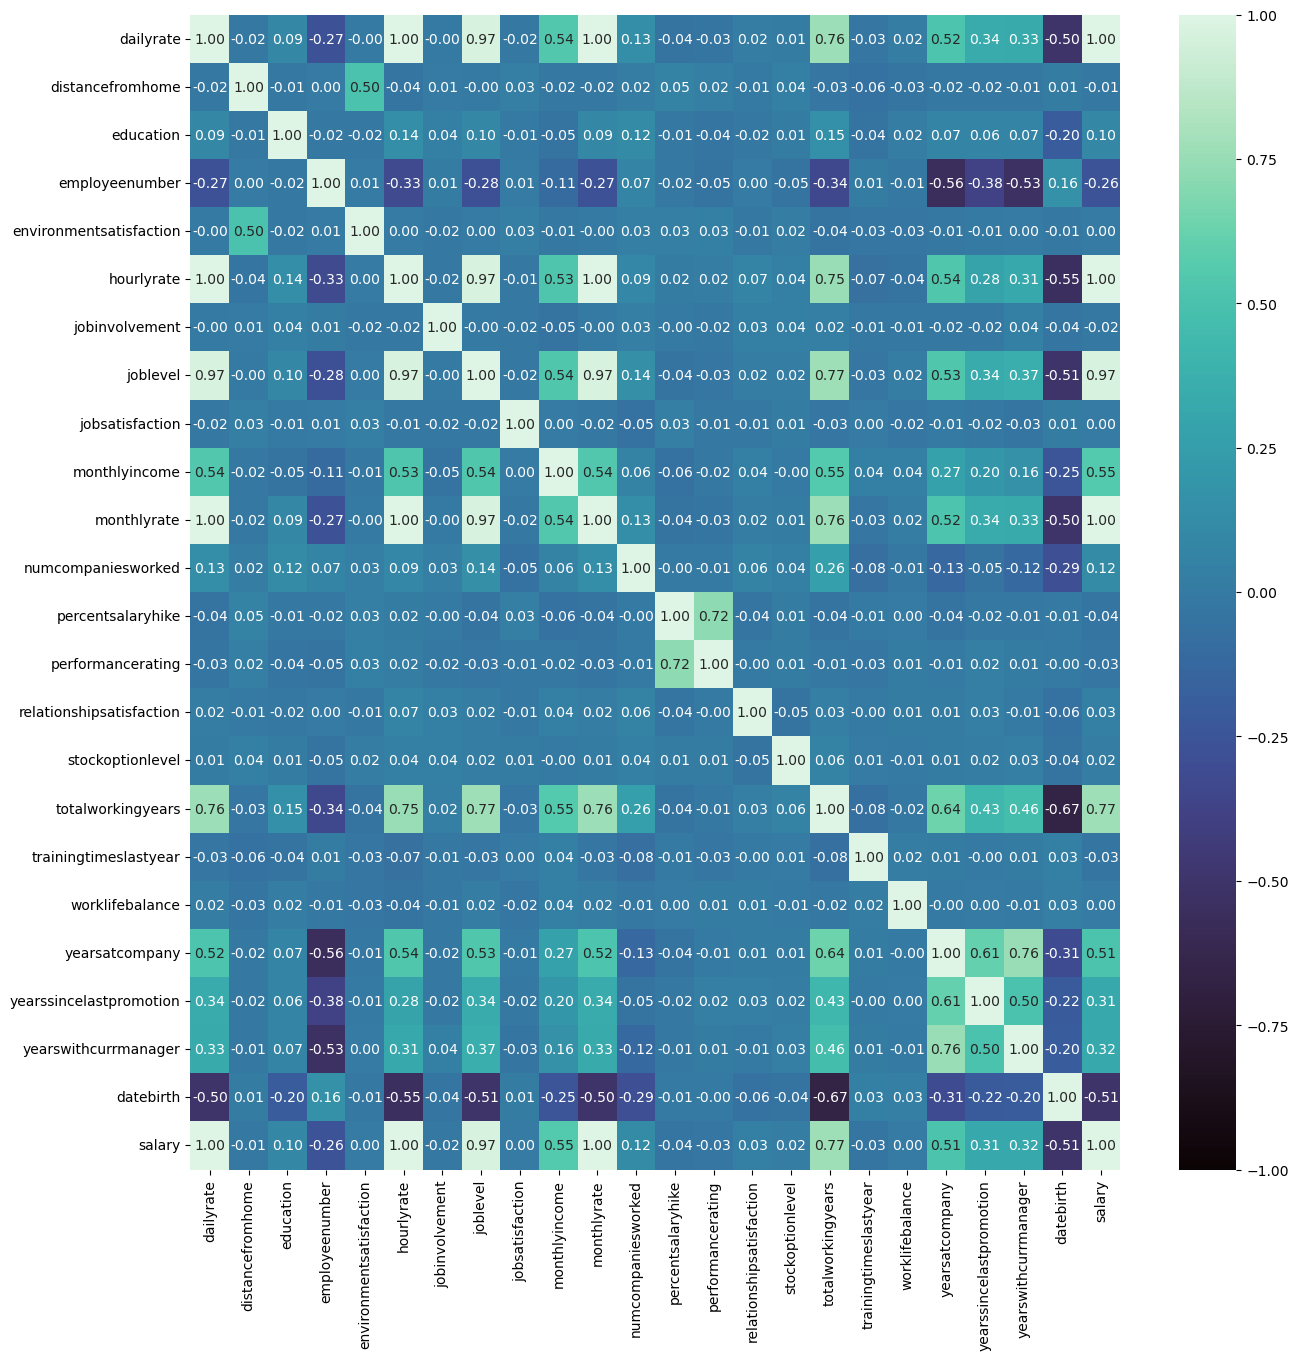

In [77]:
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara


# creamos un heatmap con la máscara
sns.heatmap(correlacion, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1);

In [78]:
df.columns

Index(['attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'standardhours', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'datebirth',
       'salary', 'remotework'],
      dtype='object')

### que cosas pueden influir en la satisfacción: ("jobsatisfaction")

Andrea:
- salary
- distancefromhome
- joblevel, department
- gender
- datebirth
- remotework
- bussinestravel
- education - jobrole 

Isa:
- standardhours
- yearsatcompany - yearsincurrentrole
- performancerating


#### Comparamos salario con satisfación del empleado, no encontramnos relación entre ambas. 

Establecemos un límite entre salario de 60.000 y 70.000, ya que todos cobran más de 60.000

In [79]:
df["attrition"].value_counts()

attrition
No     1355
Yes     259
Name: count, dtype: int64

<Axes: xlabel='jobsatisfaction', ylabel='salary'>

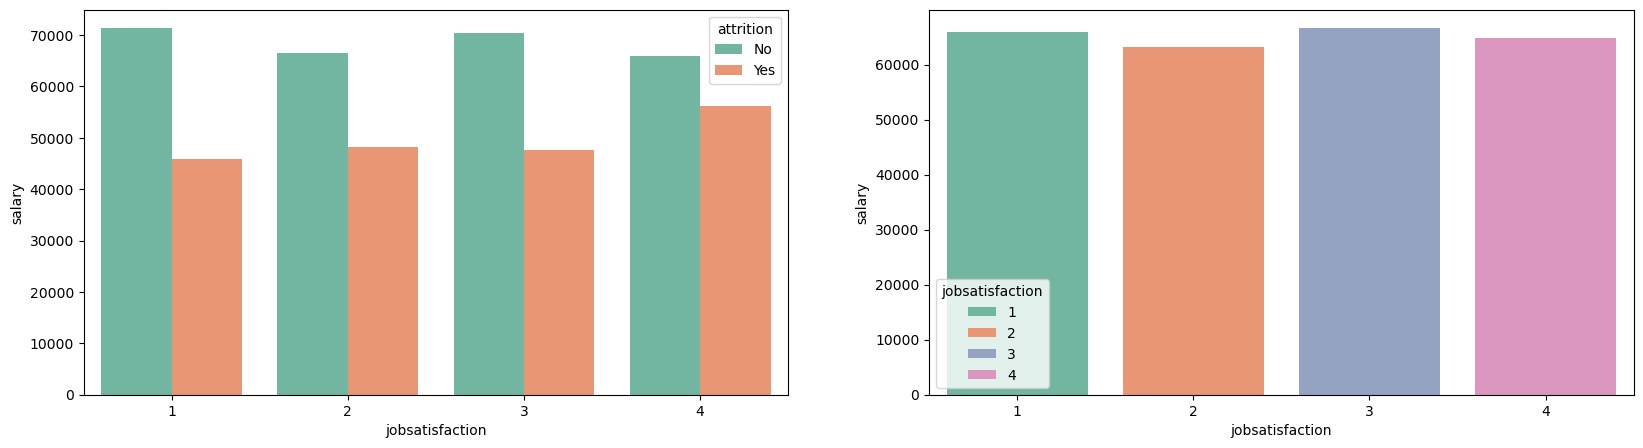

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.barplot(y="salary", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="jobsatisfaction", 
            palette="Set2", 
            ax=axes[1])

sns.barplot(y="salary", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            palette="Set2", 
            ax=axes[0])


#### NO INCLUIMOS: Comparamos distancefromhome con satisfación del empleado, no encontramnos relación entre ambas. 

Establecemos un límite entre 8,12

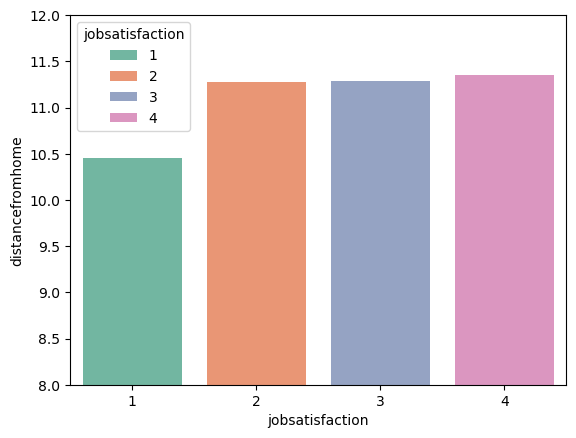

In [81]:
sns.barplot(y="distancefromhome", x="jobsatisfaction", data=df, errorbar=('ci', False), hue="jobsatisfaction", palette="Set2")
plt.ylim(8, 12);

#### NO INCLUIMOS: Comparamos joblevel, department con satisfación del empleado,

- No es relevante el nivel del puesto de trabajo con la satisfacción
- Por departamentos si se ve relacion, HHRR está menos satisfecho


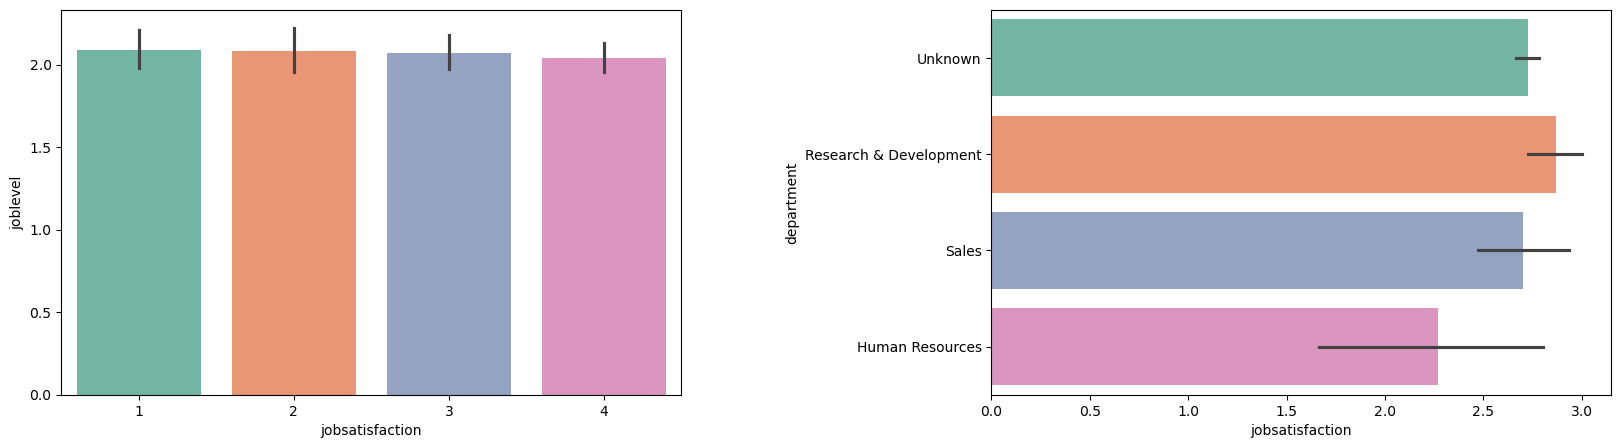

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.barplot(x="jobsatisfaction",
            y="joblevel", data=df,
            ax=axes[0], palette="Set2")

sns.barplot(x="jobsatisfaction",
            y="department", data=df,
            ax=axes[1], palette="Set2")

plt.subplots_adjust(wspace=0.5)

### ("environmentsatisfaction")

- salary
- jobrole, joblevel, department
- gender

María:
- datebirth
- yearswithcurrentmanager
- yearssincelastpromotion
- yearsincurrentrole
- yearsatcompany

### para filtrar por las personas que siguen en la empresa ("attrition")


``datebirth vs environmentsatisfaction``

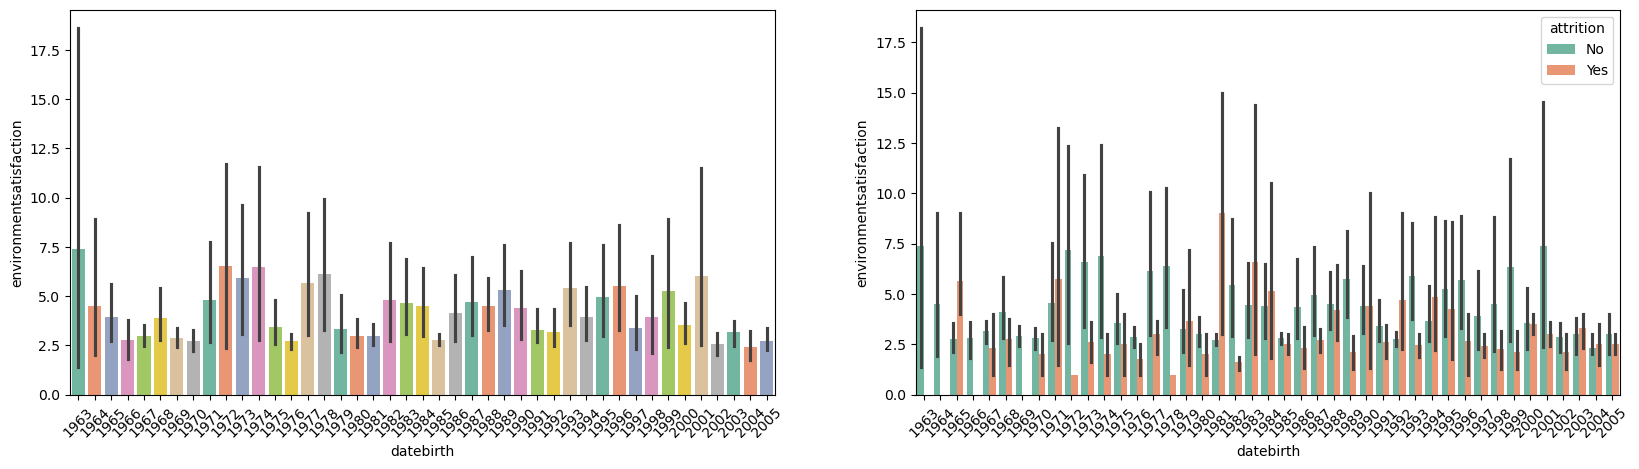

In [120]:
# Creación de gráfico por año de nacimiento

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.barplot(x="datebirth",
            y="environmentsatisfaction", 
            data=df,
            ax=axes[0],
            palette="Set2")

sns.barplot(x="datebirth",
            y="environmentsatisfaction", 
            data=df,
             ax=axes[1],
            hue="attrition",
            palette="Set2")


axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)



In [ ]:
df["environmentsatisfaction"].unique()

array([ 1,  3,  4,  2, 42, 37, 35, 25, 27, 31, 39, 21, 15, 14, 33, 19, 12,
       13, 28, 47, 36, 29, 24, 46, 16, 22, 41, 49, 11, 48, 18, 10, 45, 38,
       17, 20, 26, 43], dtype=int64)

**Conclusion**
- Correlación negativa. de -0.01.
- Si decidimos incluirlo: A medida que el año de nacimiento aumenta (es decir, los empleados son más jóvenes), la satisfacción con el entorno tiende a disminuir ligeramente.
- No observo que haya una relación que sea relevante.


``yearswithcurrmanager vs enviromentsatisfaction``

Text(0.5, 1.0, 'Satisfacción con el Entorno según los años trabajados con el manager actual')

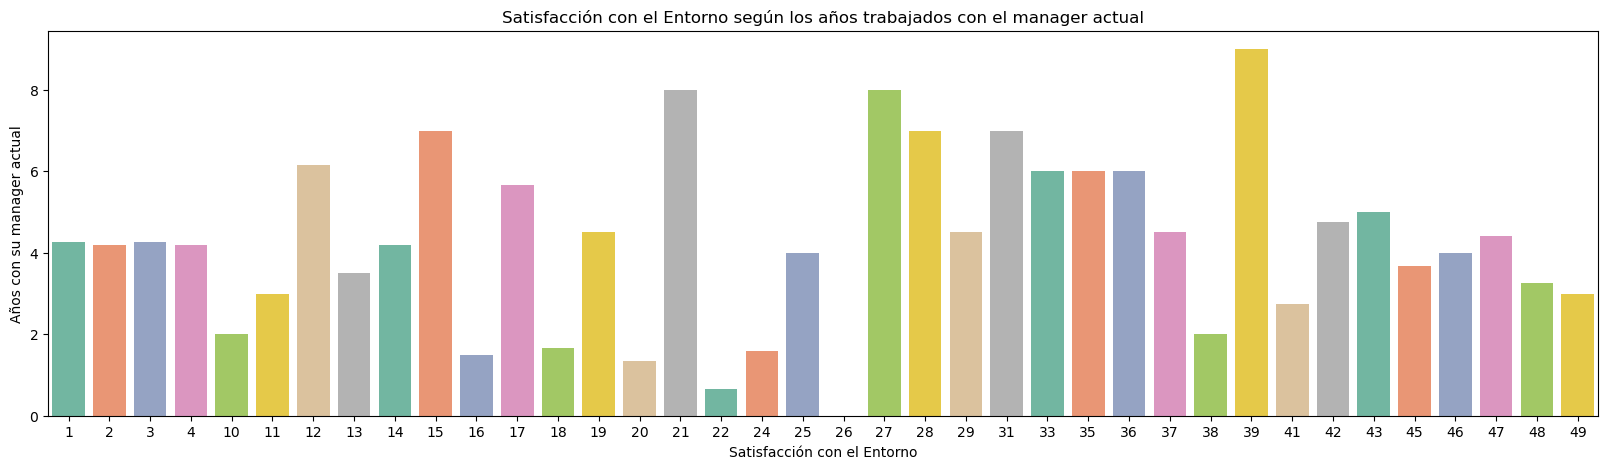

In [ ]:
# Gráfica básica: no se tiene en cuenta los empleados que están trabajando actualmente y los que no

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,5))

sns.barplot(x="environmentsatisfaction", 
            y="yearswithcurrmanager",
            data=df,  
            errorbar=('ci', False),
            palette="Set2")

plt.xlabel("Satisfacción con el Entorno")
plt.ylabel("Años con su manager actual")
plt.title("Satisfacción con el Entorno según los años trabajados con el manager actual")


Text(0.5, 1.0, 'Satisfacción con el Entorno según los años trabajados con el manager actual')

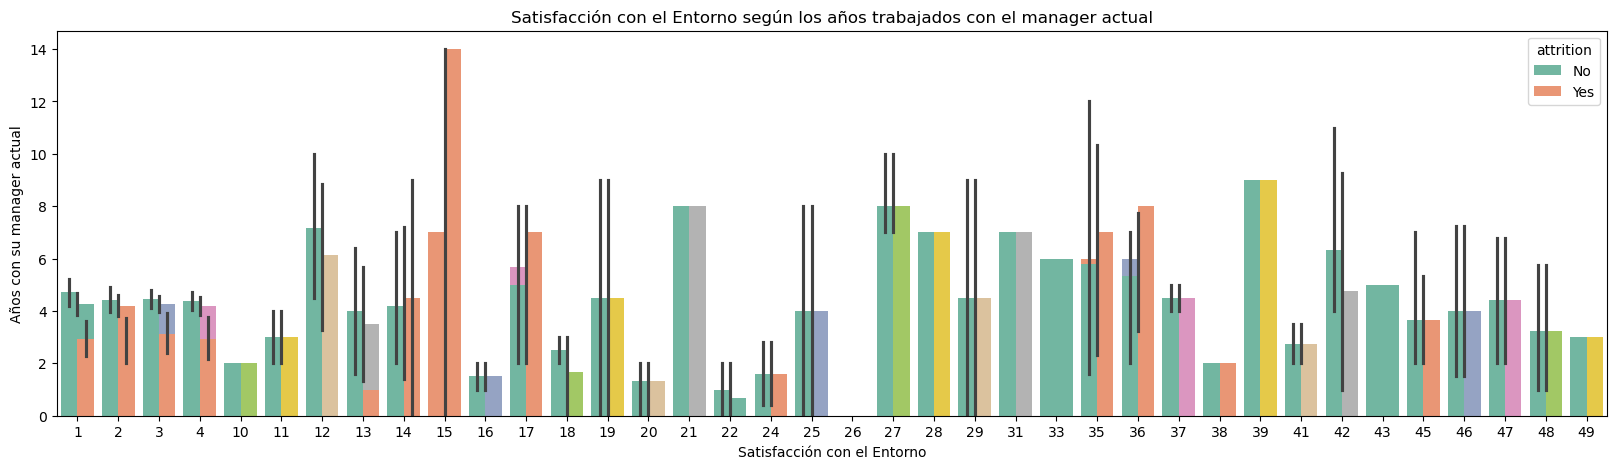

In [123]:
# Gráfica más completa: diferencia entre los empleados actuales y extrabajadores

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,5))

sns.barplot(x="environmentsatisfaction", 
            y="yearswithcurrmanager",
            data=df,
            palette="Set2")

sns.barplot(x="environmentsatisfaction",
            y="yearswithcurrmanager",
            data=df, 
            palette="Set2",
            hue="attrition")

plt.xlabel("Satisfacción con el Entorno")
plt.ylabel("Años con su manager actual")
plt.title("Satisfacción con el Entorno según los años trabajados con el manager actual")

**Conclusion**
- Correlación de 0.
- Si decidimos ponerlo: No existe una relación lineal entre la satisfacción en el entorno laboral y el manager del empleado.
- Los años que un empleado ha trabajado con el mismo gerente no influyen en su satisfacción con el entorno.


``yearssincelastpromotion vs environmentsatisfaction``

Text(0.5, 1.0, 'Satisfacción con el Entorno según los años trabajados desde el último ascenso')

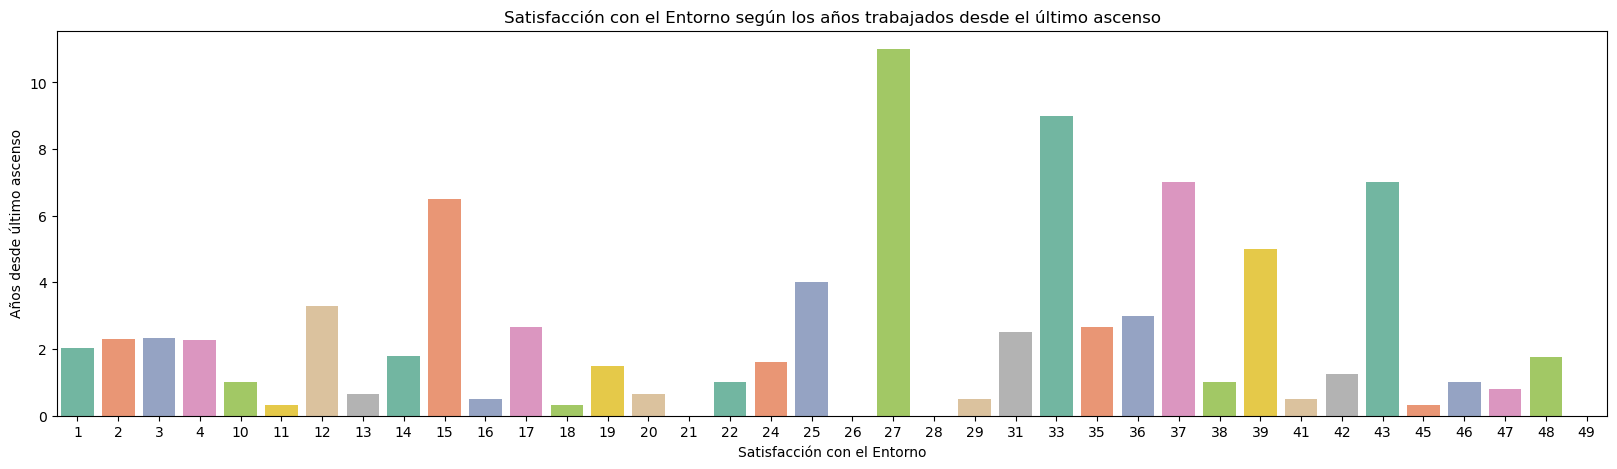

In [ ]:
# Gráfica básica: no se tiene en cuenta los empleados que están trabajando actualmente y los que no

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,5))

sns.barplot(x="environmentsatisfaction", 
            y="yearssincelastpromotion",
            data=df,  
            errorbar=('ci', False),
            palette="Set2")

plt.xlabel("Satisfacción con el Entorno")
plt.ylabel("Años desde último ascenso")
plt.title("Satisfacción con el Entorno según los años trabajados desde el último ascenso")

<Axes: xlabel='environmentsatisfaction', ylabel='yearssincelastpromotion'>

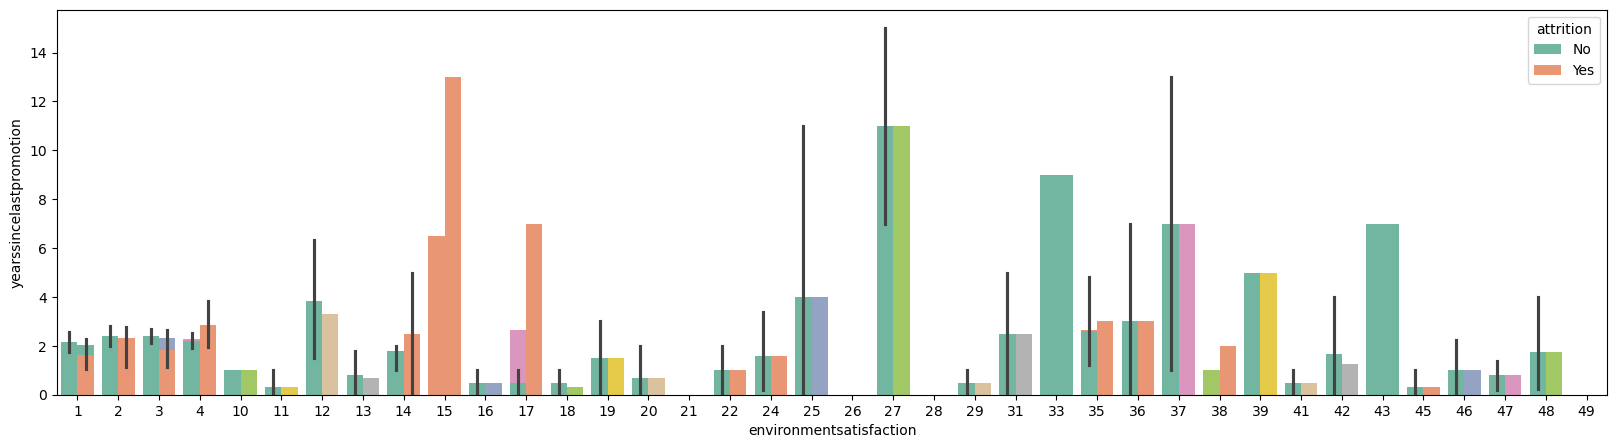

In [ ]:
# Gráfica más completa: diferencia entre los empleados actuales y extrabajadores

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,5))

sns.barplot(x="environmentsatisfaction", 
            y="yearssincelastpromotion",
            data=df,  
            errorbar=('ci', False),
            palette="Set2")

sns.barplot(x="environmentsatisfaction",
            y="yearssincelastpromotion",
            data=df, 
            palette="Set2",
            hue="attrition")

**Conclusion**
- Correlación negativa de -0.01
- Si decidimos incluirlo: A medida que han pasado más años desde el último ascenso, la satisfacción con el entorno podría disminuir muy ligeramente.
- No existe una relación relevante entre la satisfacción en el entorno laboral y los años que han pasado desde el último ascenso.

``yearsatcompany vs enviromentsatisfaction``

Text(0.5, 1.0, 'Satisfacción con el Entorno según los años trabajados en la compañía')

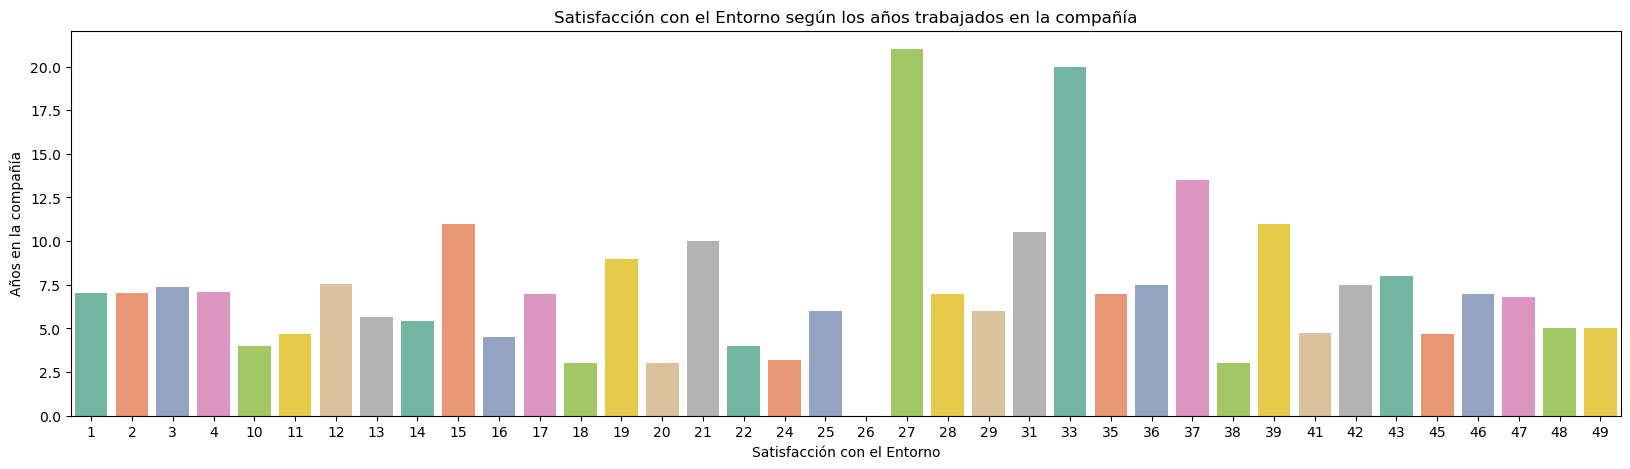

In [ ]:
# Gráfica básica: no se tiene en cuenta los empleados que están trabajando actualmente y los que no

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,5))

sns.barplot(x="environmentsatisfaction", 
            y="yearsatcompany",
            data=df,  
            errorbar=('ci', False),
            palette="Set2")

plt.xlabel("Satisfacción con el Entorno")
plt.ylabel("Años en la compañía")
plt.title("Satisfacción con el Entorno según los años trabajados en la compañía")

Text(0.5, 1.0, 'Satisfacción con el Entorno según los años trabajados en la compañía')

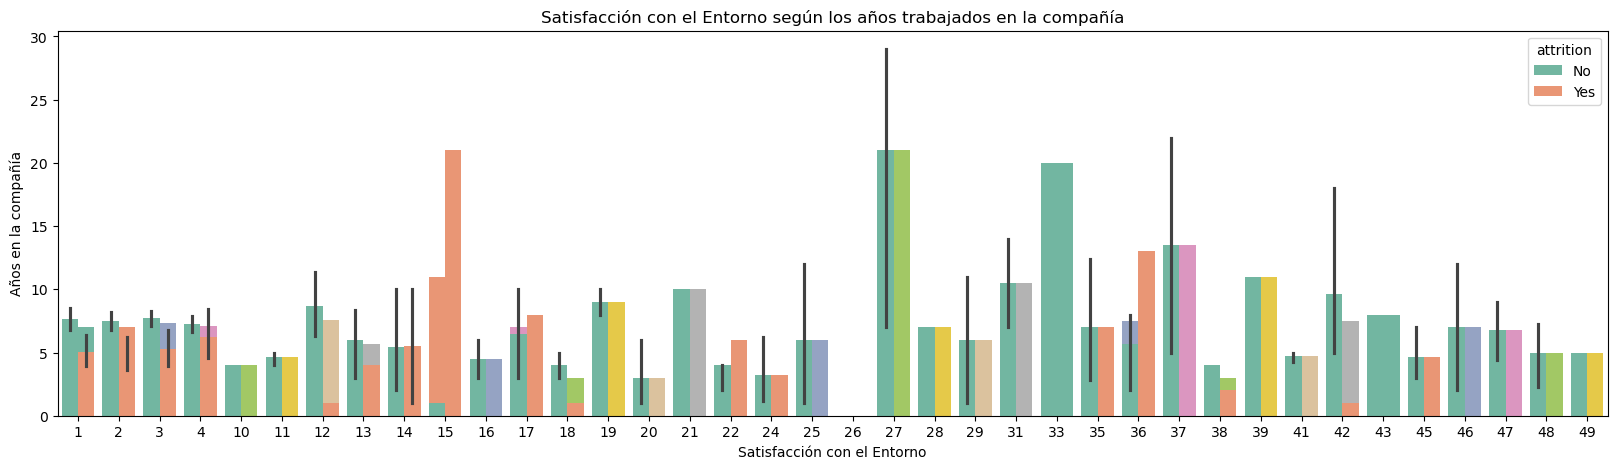

In [127]:
# Gráfica más completa: diferencia entre los empleados actuales y extrabajadores

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,5))

sns.barplot(x="environmentsatisfaction", 
            y="yearsatcompany",
            data=df,  
            errorbar=('ci', False),
            palette="Set2")

sns.barplot(x="environmentsatisfaction",
            y="yearsatcompany",
            data=df, 
            palette="Set2",
            hue="attrition")

plt.xlabel("Satisfacción con el Entorno")
plt.ylabel("Años en la compañía")
plt.title("Satisfacción con el Entorno según los años trabajados en la compañía")

**Conclusion**
- Correlación negativa de -0.01
- Si decidimos incluirlo: A medida que un empleado pasa más años en la empresa, su satisfacción con el entorno podría disminuir levemente.
- No existe una relación relevante entre la satisfacción en el entorno laboral y los años que han pasado desde el último ascenso.

# Hipótesis de relaciones

- Environmentsatisfaction vs Distancefromhome : Positiva (+0.5): A medida que la distancia desde casa aumenta, la satisfacción con el entorno también tiende a aumentar. Los empleados que están dispuestos a viajar más lejos podrían hacerlo porque valoran mucho el entorno laboral. Tal vez la empresa ofrece beneficios o comodidades que justifican el desplazamiento.
- Environmentsatisfaction vs yearsatcompany: Negativa (-0.04): A medida que los empleados acumulan más años en la empresa, su satisfacción laboral tiende a disminuir un poco.